# Credit Card Fraud Detection - Logistic Regression

### Importing the Dependencies

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [16]:
X = credit_card_data.drop(columns='Class', axis=1)
y = credit_card_data['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [28]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)

In [29]:
pos_count = y_train_smote[y_train_smote == 1].count()
neg_count = y_train_smote[y_train_smote == 0].count()

print("Positive Observations:", pos_count)
print("Negative Observations:", neg_count)
print("Shape of the training data:", X_train_smote.shape)

Positive Observations: 227451
Negative Observations: 227451
Shape of the training data: (454902, 30)


### Model Training

### Logistic Regression

In [54]:
model = LogisticRegression(solver='lbfgs', max_iter=100)

In [56]:
# training the Logistic Regression Model with Training Data
model.fit(X_train_smote, y_train_smote)

scores = cross_validate(model, X_train_smote, y_train_smote, cv=5, scoring=['roc_auc', 'average_precision'])

print("AUC Scores (5-fold Cross-Validation):", scores['test_roc_auc'])
print("Average AUC:", scores['test_roc_auc'].mean())
print("\nAverage Precision Scores (5-fold Cross-Validation):", scores['test_average_precision'])
print("Average Average Precision:", scores['test_average_precision'].mean())

AUC Scores (5-fold Cross-Validation): [0.98865265 0.98884659 0.98887661 0.98883328 0.98864639]
Average AUC: 0.9887711035570963

Average Precision Scores (5-fold Cross-Validation): [0.98998355 0.99020741 0.99008265 0.99014768 0.98994982]
Average Average Precision: 0.9900742219181222


### Model Evaluation

Accuracy Score

In [38]:
# accuracy on training data
X_train_prediction = model.predict(X_train_smote)
training_data_accuracy = accuracy_score(X_train_prediction, y_train_smote)

In [39]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9443418582463915


In [40]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [41]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9968048874688389


### Decision Trees

In [43]:
dt_classifier_smote = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_classifier_smote.fit(X_train_smote, y_train_smote)

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(dt_classifier_smote, X_train_smote, y_train_smote, cv=stratified_cv, scoring=['roc_auc', 'average_precision'])

print("AUC Scores (5-fold Cross-Validation):", scores['test_roc_auc'])
print("Average AUC:", scores['test_roc_auc'].mean())
print("\nAverage Precision Scores (5-fold Cross-Validation):", scores['test_average_precision'])
print("Average Average Precision:", scores['test_average_precision'].mean())

AUC Scores (5-fold Cross-Validation): [0.99736833 0.99749091 0.99766827 0.99735092 0.9975794 ]
Average AUC: 0.9974915652437509

Average Precision Scores (5-fold Cross-Validation): [0.99629569 0.99661571 0.99643596 0.99626122 0.99659194]
Average Average Precision: 0.9964401041056418


In [44]:
from sklearn.metrics import roc_auc_score
y_pred_smote = dt_classifier_smote.predict_proba(X_test_normalized)[:,1]
auc_smote = roc_auc_score(y_test, y_pred_smote)
print("SMOTE:", auc_smote)

SMOTE: 0.9095714766632595


Confusion Matrix for SMOTE


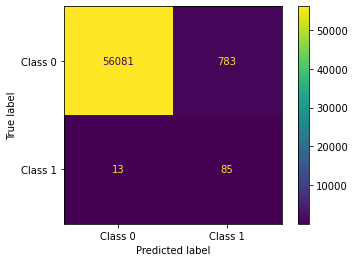

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Confusion Matrix for SMOTE")
cm = confusion_matrix(y_test, y_pred_smote>=0.5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Class 0", "Class 1"])
disp.plot()
plt.show()

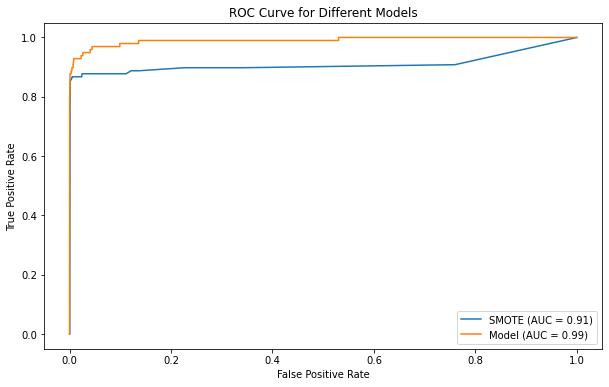

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fprs = []
tprs = []
auc_scores = []

models = [dt_classifier_smote, model]
model_names = ['SMOTE', 'Model']

plt.figure(figsize=(10, 6))

for model in models:
    y_pred_prob = model.predict_proba(X_test_normalized)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    fprs.append(fpr)
    tprs.append(tpr)
    auc_scores.append(auc)

for i in range(2):
    plt.plot(fprs[i], tprs[i], label=f'{model_names[i]} (AUC = {auc_scores[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()

plt.show()